In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
n_samples = 10000

In [5]:
x = np.zeros(n_samples)

In [6]:
x[1] = 1
alpha = -0.001

a_0 = 2*np.exp(alpha) * np.cos(2*np.pi*0.005)
a_1 = - np.exp(2*alpha)

In [7]:
for i in range(2,n_samples):
    x[i]= a_0 * x[i-1] + a_1 * x[i-2] + np.random.randn()

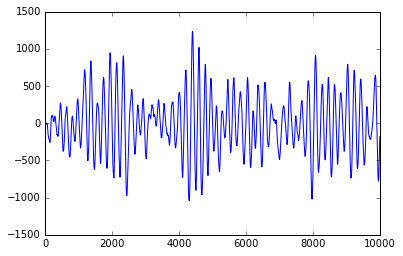

In [8]:
plt.plot(x)

In [9]:
X = np.array([[x[i-1],x[i-2]] for i in range(2,1000)])
Y = np.array([x[i] for i in range(2,1000)])

### Coefficients to find 

In [10]:
a_true = np.array([a_0, a_1]).reshape(-1,1)

In [11]:
a_true

array([[ 1.99701511],
       [-0.998002  ]])

### Finding coefficients with Tensorflow

In [12]:
import tensorflow as tf

In [13]:
X_tf = tf.placeholder(dtype=tf.float32, shape=[None,2], name="X_tf")
Y_tf = tf.placeholder(dtype=tf.float32, shape=[None,1], name="Y_tf")


In [14]:
epsilon_tf = tf.Variable(tf.random_normal([2,1], stddev=1.0, dtype=tf.float32), name="epsilon_tf")
a_tf = tf.Variable(tf.random_normal([2,1], stddev=1.0, dtype=tf.float32))
# a_tf = tf.Variable(initial_value=coeffs_true)

In [15]:
#for i in range(2:1000)
#    Y_tf[i] = tf.matmul(a_tf, X_tf) +

In [36]:
loss = tf.reduce_mean(
    tf.square(
        tf.subtract(
            tf.matmul(X_tf,a_tf), Y_tf
        )
    )
)

In [37]:
train_op = tf.train.AdamOptimizer(learning_rate=0.01, epsilon=1E-12).minimize(loss)

In [38]:
# train_op = tf.train.MomentumOptimizer(learning_rate=0.01,momentum=0).minimize(loss)

In [39]:
# train_op = tf.train.ProximalAdagradOptimizer(learning_rate=0.5).minimize(loss)

### Init Session

In [40]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [41]:
loss_list = []

In [42]:
sess.run(a_tf, feed_dict={X_tf:X, Y_tf:Y.reshape(-1,1)})

array([[-0.36336908],
       [-0.63079107]], dtype=float32)

In [43]:
for i in range(100000):
    sess.run(train_op, feed_dict={X_tf:X, Y_tf:Y.reshape(-1,1)})
    loss_val = sess.run(loss, feed_dict={X_tf:X, Y_tf:Y.reshape(-1,1)})
    loss_list.append(loss_val)

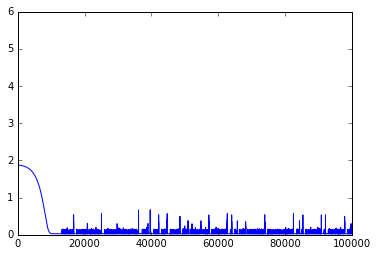

In [44]:
plt.plot(np.log10(loss_list))

In [47]:
sess.run(a_tf, feed_dict={X_tf:X, Y_tf:Y.reshape(-1,1)})

array([[ 1.98685229],
       [-0.9880107 ]], dtype=float32)

In [48]:
a_true

array([[ 1.99701511],
       [-0.998002  ]])

### Comments
The estimated value is close to the true value ! Mission accomplished.